# **FYP-EEE-A3245-211**
# **Face Transformation using StyleGAN**

This is a Google Colab notebook for projecting real photographs into the StyleGAN2 latent space.

---
# **Mount Google Drive (Optional)**


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


---
# **0. Install/Import Prerequisites**

In [1]:
!pip install --upgrade --no-cache-dir gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14774 sha256=99443288a7a0c2af02a10fbbe58ab0e8a5d0c77bc91eb9f17fda327a89ff7044
  Stored in directory: /tmp/pip-ephem-wheel-cache-032hnddo/wheels/fb/c3/0e/c4d8ff8bfcb0461afff199471449f642179b74968c15b7a69c
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.2.2
    Uninstalling gdown-4.2.2:
      Successfully uninstalled gdown-4.2.2


In [2]:
!pip install ninja

     |████████████████████████████████| 108 kB 5.4 MB/s 


In [3]:
# clone the StyleGAN2 repository
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 128, done.
remote: Total 128 (delta 0), reused 0 (delta 0), pack-reused 128
Receiving objects: 100% (128/128), 1.12 MiB | 8.20 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [4]:
# download the pretained StyleGAN2 network
!gdown --id 1f9ZWi2iV26AMixY1dtO_tkc59oSCvDTS

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1f9ZWi2iV26AMixY1dtO_tkc59oSCvDTS
To: /content/stylegan2-ffhq-config-f.pkl
100% 382M/382M [00:01<00:00, 204MB/s]


In [5]:
# clone the FFHQ repository
!git clone https://github.com/NVlabs/ffhq-dataset

Cloning into 'ffhq-dataset'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 70 (delta 4), reused 4 (delta 2), pack-reused 60
Unpacking objects: 100% (70/70), done.


In [6]:
# download the facial landmark predictor 
!gdown --id 10OXL-xHR0ox4qMqBibucpLdOhs6XaCyZ

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=10OXL-xHR0ox4qMqBibucpLdOhs6XaCyZ
To: /content/shape_predictor_68_face_landmarks.dat
100% 99.7M/99.7M [00:00<00:00, 123MB/s]


In [7]:
# download the projection json file
!gdown --id 1YfKvzhVh3hoAN1Yf1c_IHO1-0NNfww88

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1YfKvzhVh3hoAN1Yf1c_IHO1-0NNfww88
To: /content/ffhq-dataset-v2.json
100% 268M/268M [00:02<00:00, 121MB/s]


In [8]:
# download an image for projection

# Default image : Leonardo DiCaprio 2017
# https://commons.wikimedia.org/wiki/File:Leonardo_DiCaprio_2017.jpg
# Reunión con Leonardo DiCaprio y Carlos Slim by Presidencia de la República Mexicana CC BY 2.0
!gdown --id 1llyKE_oyucLLvaQMa0lauo0k2Wol6O0I

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1llyKE_oyucLLvaQMa0lauo0k2Wol6O0I
To: /content/Leonardo_DiCaprio_2017.jpg
100% 188k/188k [00:00<00:00, 53.8MB/s]


In [9]:
# download some previously projected data
!gdown --id 1tqHLSKNvUEqwFPJe83-7eaZjODOU_kd7 # aligned image
!gdown --id 1TdjuzqeVBJzyrrOQpZzeirewxVKL6oQy # projected latent vector
!gdown --id 1URumMaeILtDrRHOjrgRfPL1ONtYyztny # projected image

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1tqHLSKNvUEqwFPJe83-7eaZjODOU_kd7
To: /content/Leonardo_DiCaprio_2017_Aligned.jpg.png
100% 238k/238k [00:00<00:00, 90.0MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1TdjuzqeVBJzyrrOQpZzeirewxVKL6oQy
To: /content/LeonardoDicaprio.npz
100% 37.1k/37.1k [00:00<00:00, 47.9MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=Futur

---
# **1. Generic *matplotlib* Plotting Function**

In [10]:
# Display Images In A Square Grid Layout
def im_show(images, ncols, title=[], img_size=5, font_size=8, grayscale=False):
    fig = plt.figure(figsize=(img_size, img_size))
    for idx, img in enumerate(images):
        fig.add_subplot(ncols, ncols, idx+1)
        if title: plt.title(title[idx])
        if not grayscale: plt.imshow(img)
        else: plt.imshow(img, cmap='gray')
        plt.axis('off')

    plt.show()

---
# **2. StlyeGAN2 Setup**

In [11]:
%cd /content/stylegan2-ada-pytorch/

import os
import io
import cv2
import torch
import random
import warnings

import numpy as np
import IPython.display

from PIL import Image
from pathlib import Path
from matplotlib import pyplot as plt

import dnnlib
import legacy

/content/stylegan2-ada-pytorch


## **2.1. Helper Functions**

In [12]:
# Get shape of latent vector and torch label
def setup_image_generation(G, device):
  z_shape = G.z_dim
  zero_label = torch.zeros([1, G.c_dim], device=device)
  # print('Setting up image generation...', end=' ')
  z = generate_latent_vector(0, z_shape)
  img = generate_image(z, zero_label)
  del z, img
  # print('Done')
  return z_shape, zero_label

# Check if cuda is available
def torch_is_cuda_available():
  if torch.cuda.is_available(): 
    print('CUDA is available. Using device \'0\': %s'%(torch.cuda.get_device_name(0)))
    return 'cuda'
  else:
    warnings.warn('Warning! Using CPU...')
    return 'cpu'

# Load selected network
def load_network(path_to_network):
  print('Unpacking network file...', end=' ')
  with dnnlib.util.open_url(path_to_network) as f:
      G = legacy.load_network_pkl(f)['G_ema'].to(device)
  print('Done')
  return G

# Generate latent vector
def generate_latent_vector(seed, shape):
  # Construct random number generator
  # Generate vector of size[1,512]
  rnd = np.random.RandomState(seed)
  z = rnd.randn(1, shape)
  return z

# Generate Image
def generate_image(z, label, truncation_psi=0.5, noise_mode="const"):
  z = torch.from_numpy(z).to(device)
  img_gpu = G(z, label, truncation_psi=truncation_psi, noise_mode=noise_mode)
  img_tensor = (img_gpu.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
  img = np.transpose(img_tensor.cpu().numpy()[0], (0,1,2))
  return img

## **2.2. Initialize StyleGAN2**

In [13]:
path_to_network = "/content/stylegan2-ffhq-config-f.pkl"

In [14]:
# Initialize network and setup for image generation
device = torch.device(torch_is_cuda_available())
G = load_network(path_to_network)
(z_shape, label) = setup_image_generation(G, device)
print('Ready')

CUDA is available. Using device '0': Tesla K80
Unpacking network file... Done
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Ready


---
# **3. FFHQ Face Alignment**

## **3.1. Load Dlib Face Detector**

In [15]:
import dlib

In [16]:
detector_path = '/content/shape_predictor_68_face_landmarks.dat'

In [17]:
# prepare Dlib detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(detector_path)

**Select image to project**

In [18]:
# modify path to change image to project
# face_file_path = <path_to_image> 

face_file_path = '/content/Leonardo_DiCaprio_2017.jpg'

In [19]:
# function to convert dlib object to numpy array
def shape_to_normal(shape):
    shape_normal = []
    for i in range(68):
        shape_normal.append((i, (shape.part(i).x, shape.part(i).y)))
    return shape_normal

# detect face and convert to np format
face_original = cv2.imread(face_file_path)
gray = cv2.cvtColor(face_original, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)

if len(rects) > 0:
  face_original_shape = predictor(gray, rects[0])
  face_original_shape = shape_to_normal(face_original_shape)

In [24]:
# reshape numpy array for alignment
face_shape = []
for p in list(dict(face_original_shape).values()):
  face_shape.append(list(p))

## **3.2. Align Face using Adapted FFHQ Alignment Algorithm**

In [20]:
import json
import PIL
import scipy
import scipy.ndimage
from collections import OrderedDict, defaultdict

In [21]:
json_path = '/content/ffhq-dataset-v2.json'

In [22]:
# prepare json file
print('Parsing JSON metadata...')
json_spec = dict(file_url='https://drive.google.com/u?id=16N0RV4fHI6joBuKbQAoG34V_cQk7vxSA', 
                 file_path=json_path, 
                 file_size=267793842, 
                 file_md5='425ae20f06a4da1d4dc0f46d40ba5fd6')

with open(json_spec['file_path'], 'rb') as f:
    json_data = json.load(f, object_pairs_hook=OrderedDict)
print('Done...')

Parsing JSON metadata...
Done...


In [25]:
# adapted algorithm for face alignment
# original: recreate_aligned_images from download_ffhq.py
# https://github.com/NVlabs/ffhq-dataset/blob/master/download_ffhq.py

# FFHQ faceLignment parameters
dst_dir = 'realign1024x1024'
output_size = 1024
transform_size = 4096
enable_padding = True
rotate_level = True 
random_shift = 0.0
retry_crops = False

print('Recreating aligned images...')

# Fix random seed for reproducibility
np.random.seed(12345)
# The following random numbers are unused in present implementation, but we consume them for reproducibility
_ = np.random.normal(0, 1, (len(json_data.values()), 2))

for item_idx, item in enumerate(json_data.values()):
    # Parse landmarks.
    lm = face_shape
    lm_chin          = lm[0  : 17]  # left-right
    lm_eyebrow_left  = lm[17 : 22]  # left-right
    lm_eyebrow_right = lm[22 : 27]  # left-right
    lm_nose          = lm[27 : 31]  # top-down
    lm_nostrils      = lm[31 : 36]  # top-down
    lm_eye_left      = lm[36 : 42]  # left-clockwise
    lm_eye_right     = lm[42 : 48]  # left-clockwise
    lm_mouth_outer   = lm[48 : 60]  # left-clockwise
    lm_mouth_inner   = lm[60 : 68]  # left-clockwise

    # Calculate auxiliary vectors.
    eye_left     = np.mean(lm_eye_left, axis=0)
    eye_right    = np.mean(lm_eye_right, axis=0)
    eye_avg      = (eye_left + eye_right) * 0.5
    eye_to_eye   = eye_right - eye_left
    mouth_left   = lm_mouth_outer[0]
    mouth_right  = lm_mouth_outer[6]
    mouth_left_right = [sum(x) for x in zip(mouth_left, mouth_right)]
    mouth_avg    = [mouth_left_right[0]/2, mouth_left_right[1]/2,]
    eye_to_mouth = mouth_avg - eye_avg

    # Choose oriented crop rectangle.
    if rotate_level:
        x = eye_to_eye - np.flipud(eye_to_mouth) * [-1, 1]
        x /= np.hypot(*x)
        x *= max(np.hypot(*eye_to_eye) * 2.0, np.hypot(*eye_to_mouth) * 1.8)
        y = np.flipud(x) * [-1, 1]
        c0 = eye_avg + eye_to_mouth * 0.1
    else:
        x = np.array([1, 0], dtype=np.float64)
        x *= max(np.hypot(*eye_to_eye) * 2.0, np.hypot(*eye_to_mouth) * 1.8)
        y = np.flipud(x) * [-1, 1]
        c0 = eye_avg + eye_to_mouth * 0.1

    img = PIL.Image.open(face_file_path)

    quad = np.stack([c0 - x - y, c0 - x + y, c0 + x + y, c0 + x - y])
    qsize = np.hypot(*x) * 2

    # Keep drawing new random crop offsets until we find one that is contained in the image
    # and does not require padding
    if random_shift != 0:
        for _ in range(1000):
            # Offset the crop rectange center by a random shift proportional to image dimension
            # and the requested standard deviation
            c = (c0 + np.hypot(*x)*2 * random_shift * np.random.normal(0, 1, c0.shape))
            quad = np.stack([c - x - y, c - x + y, c + x + y, c + x - y])
            crop = (int(np.floor(min(quad[:,0]))), int(np.floor(min(quad[:,1]))), int(np.ceil(max(quad[:,0]))), int(np.ceil(max(quad[:,1]))))
            if not retry_crops or not (crop[0] < 0 or crop[1] < 0 or crop[2] >= img.width or crop[3] >= img.height):
                # We're happy with this crop (either it fits within the image, or retries are disabled)
                break
        else:
            # rejected N times, give up and move to next image
            # (does not happen in practice with the FFHQ data)
            print('rejected image')
            break

    # Shrink.
    shrink = int(np.floor(qsize / output_size * 0.5))
    if shrink > 1:
        rsize = (int(np.rint(float(img.size[0]) / shrink)), int(np.rint(float(img.size[1]) / shrink)))
        img = img.resize(rsize, PIL.Image.ANTIALIAS)
        quad /= shrink
        qsize /= shrink

    # Crop.
    border = max(int(np.rint(qsize * 0.1)), 3)
    crop = (int(np.floor(min(quad[:,0]))), int(np.floor(min(quad[:,1]))), int(np.ceil(max(quad[:,0]))), int(np.ceil(max(quad[:,1]))))
    crop = (max(crop[0] - border, 0), max(crop[1] - border, 0), min(crop[2] + border, img.size[0]), min(crop[3] + border, img.size[1]))
    if crop[2] - crop[0] < img.size[0] or crop[3] - crop[1] < img.size[1]:
        img = img.crop(crop)
        quad -= crop[0:2]

    # Pad.
    pad = (int(np.floor(min(quad[:,0]))), int(np.floor(min(quad[:,1]))), int(np.ceil(max(quad[:,0]))), int(np.ceil(max(quad[:,1]))))
    pad = (max(-pad[0] + border, 0), max(-pad[1] + border, 0), max(pad[2] - img.size[0] + border, 0), max(pad[3] - img.size[1] + border, 0))
    if enable_padding and max(pad) > border - 4:
        pad = np.maximum(pad, int(np.rint(qsize * 0.3)))
        img = np.pad(np.float32(np.array(img)), ((pad[1], pad[3]), (pad[0], pad[2]), (0, 0)), 'reflect')
        h, w, _ = img.shape
        y, x, _ = np.ogrid[:h, :w, :1]
        mask = np.maximum(1.0 - np.minimum(np.float32(x) / pad[0], np.float32(w-1-x) / pad[2]), 1.0 - np.minimum(np.float32(y) / pad[1], np.float32(h-1-y) / pad[3]))
        blur = qsize * 0.02
        img += (scipy.ndimage.gaussian_filter(img, [blur, blur, 0]) - img) * np.clip(mask * 3.0 + 1.0, 0.0, 1.0)
        img += (np.median(img, axis=(0,1)) - img) * np.clip(mask, 0.0, 1.0)
        img = PIL.Image.fromarray(np.uint8(np.clip(np.rint(img), 0, 255)), 'RGB')
        quad += pad[:2]

    # Transform.
    img = img.transform((transform_size, transform_size), PIL.Image.QUAD, (quad + 0.5).flatten(), PIL.Image.BILINEAR)
    if output_size < transform_size:
        img = img.resize((output_size, output_size), PIL.Image.ANTIALIAS)

    # Save aligned image.
    img.save('/content/face_ffhq_aligned.png') 
    print('done')

    break

Recreating aligned images...
done


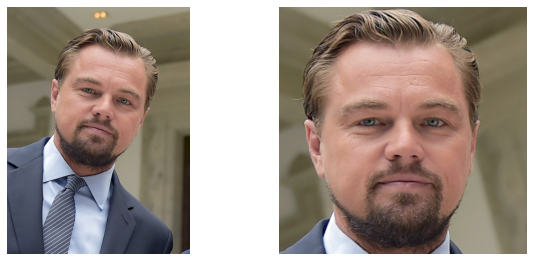

In [26]:
# Preview both original and aligned face
original = cv2.imread(face_file_path)[:,:,::-1]
aligned = cv2.imread('/content/face_ffhq_aligned.png')[:,:,::-1]
im_show([original, aligned], 2, img_size=10)

---
# **4. Image Projection**

In [29]:
%cd /content/stylegan2-ada-pytorch/

/content/stylegan2-ada-pytorch


In [30]:
ffhq_aligned = '/content/face_ffhq_aligned.png'

In [ ]:
# create folder to hold projection result
!mkdir /content/out

In [ ]:
# clear previously projected results, if any
!rmdir /content/out/*.*

rmdir: failed to remove '/content/out/*.*': No such file or directory


**Run the cell below to project a new face** <br>

**Skip this if you only wish to preview a previously projected face**

In [ ]:
# uncomment the code below to project a new face

# !python projector.py --outdir='/content/out' --target='/content/face_ffhq_aligned.png'\
#     --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.54 loss 24569.43
step    2/1000: dist 0.61 loss 27642.83
step    3/1000: dist 0.60 loss 27167.63
step    4/1000: dist 0.55 loss 26253.67
step    5/1000: dist 0.57 loss 24958.54
step    6/1000: dist 0.58 loss 23356.14
step    7/1000: dist 0.53 loss 21513.70
step    8/1000: dist 0.61 loss 19486.14
step    9/1000: dist 0.57 loss 17342.22
step   10/1000: dist 0.56 loss 15145.47
step   11/1000: dist 0.48 loss 12946.05
step   12/1000: dist 0.54 loss 10817.89
step   13/1000: dist 0.50 loss 8803.67
step   14/1000: dist 0.49 loss 6948.95
step   15/1000: dist 0.46 loss 5315.39
step   16/1000: dist 0.44 loss 3971.67
step   17/1000: dist 0.50 loss 2944.82
step   18/1000: dist 0.47 loss 2212.41
step   19/1000: dist 0

**Uncomment this cell to preview <font color='red'>newly</font> projected face**

In [28]:
# # Preview original, aligned and projected image
# original = cv2.imread(face_file_path)[:,:,::-1]
# aligned = cv2.imread('/content/face_ffhq_aligned.png')[:,:,::-1]

# projected = '/content/out/proj.png'
# projected = cv2.imread(projected)[:,:,::-1]

# # modify img_size to change plot size if needed
# im_show([original, aligned, projected], 3, img_size=20)

**A preview of a previously project face**

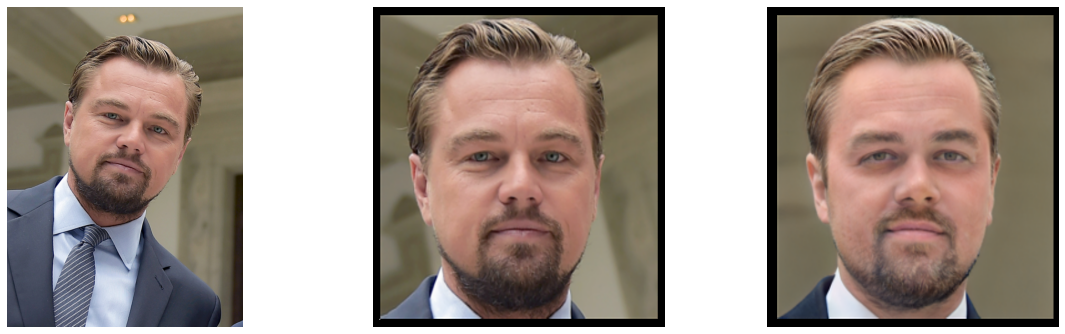

In [27]:
# Preview original, aligned and projected image
original = cv2.imread('/content/Leonardo_DiCaprio_2017.jpg')[:,:,::-1]
aligned = cv2.imread('/content/Leonardo_DiCaprio_2017_Aligned.jpg.png')[:,:,::-1]
projected = cv2.imread('/content/Leonardo_DiCaprio_2017_Projected.jpg.png')[:,:,::-1]

# modify img_size to change plot size if needed
im_show([original, aligned, projected], 3, img_size=20)

**The projected results are stored in /content/out**<br>

**The folder content are shown in the table below...** <br>

```markdown
File               | Description
-------------------|------------------
proj.mp4           | A video showing projection process
proj.png           | Projection results 
projected_w.npz    | Projected latent vector results 
target.png         | Original image

```

---
# **Extra. Recreate Projected Image**

In [ ]:
projected_npz = '/content/out/projected_w.npz'

In [ ]:
# How to load and generate the projected face

ws = np.load(projected_npz)['w']
ws = torch.tensor(ws, device=device)
assert ws.shape[1:] == (G.num_ws, G.w_dim)
for idx, w in enumerate(ws):
    img = G.synthesis(w.unsqueeze(0), noise_mode='const')
    img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
    img = PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')

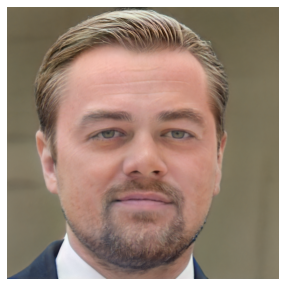

In [ ]:
im_show([img], 1)